## AMATH Scientific Computing
### Homework-4
#### Manjaree Binjolkar

In [1]:
import numpy as np
import scipy.sparse 
import matplotlib.pyplot as plt
import pdb
import numpy.matlib
import time
import copy

from matplotlib import animation, rc
from scipy.sparse.linalg import spsolve
from scipy.integrate import solve_ivp
from scipy.sparse.linalg import splu
from scipy.sparse import csr_matrix, triu, spdiags

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv

1. 1. We will start by using 129 equally spaced points between [􀀀L; L] (including L),
and then removing L so that your computational domain has 128 equally spaced
points. This de nes  x. Use 501 equally spaced points between [0; 2] (including
the endpoints). This defines  t. Calculate the CFL number and call it   .

## A5 128

In [2]:
m = 129
L = 10
x1 = np.linspace(-L, L, m)
x = x1[:-1]
delta_x = x[1] - x[0]
#print(delta_x)
#print(np.shape(delta_x))
t = np.linspace(0, 2, 501, endpoint = True)
delta_t = t[1] - t[0]
#print(delta_t)
#print(np.shape(delta_t))
#print(t)
#print(np.shape(t))
#calculate the CFL number λ and call it λ∗
alpha = 2
lambda_star = alpha*(delta_t)/(delta_x**2)
#print(lambda_star)
#print(np.shape(lambda_star))

# (1,4)-accurate scheme (first-order accurate in time, fourth-order accurate in space)
G = lambda z: lambda_star*(32*np.cos(z)-2*np.cos(2*z)-30)*(1/12)+1

A1 = copy.deepcopy(G(1))

G_one = lambda z: np.abs(G(z)); # Define the function we want to maximize
index = scipy.optimize.fminbound(lambda z:-G_one(z), -np.pi,np.pi) # This gives the *maximizer*
maximum = G_one(index)
#print(maximum)

A2 = copy.deepcopy(maximum)

#D4
n = 128
#sparse matrix for derivative term
e1 = np.ones(n)
d_D4 = [-n+1,-n+2,-2,-1,0,1,2,n-2,n-1]
D4 = scipy.sparse.spdiags([16*e1,-e1,-e1,16*e1,-30*e1,16*e1,-e1,-e1,16*e1],d_D4,n,n)
#print(D4.todense())
D4 *= 1/12
#print(D4.todense())

A3 = copy.deepcopy(D4.todense())

#Forward Euler
#initial conditions - FE
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_fe = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_fe[:,0] = u0
u1 = u0
CFL = lambda_star
for j in range(time_steps):
    u2 = u1 + CFL*(D4@u1)
    u1 = u2
    usol_fe[:,j+1] = u2
    
A4 = 0

A5_128 = copy.deepcopy(usol_fe[:,-1].reshape(128,1))

#A5

In [3]:
print(n)

128


## A9 128

In [4]:
# Crank Nicholoson scheme (first-order accurate in time, fourth-order accurate in space)
G_CN = lambda z: (1+lambda_star/2*(2*np.cos(z)-2))/(1-lambda_star/2*(2*np.cos(z)-2))

G_one_CN = lambda z: np.abs(G_CN(z)); # Define the function we want to maximize
index_CN = scipy.optimize.fminbound(lambda z:-G_one_CN(z), -np.pi,np.pi) # This gives the *maximizer*
maximum_CN = G_one_CN(index_CN)
#print(maximum_CN)

A6 = copy.deepcopy(maximum_CN)

d_B = [-n+1,-1,0,1,n-1]
B = scipy.sparse.spdiags([(-lambda_star/2)*e1,(-lambda_star/2)*e1,(1+lambda_star)*e1,(-lambda_star/2)*e1,(-lambda_star/2)*e1],d_B,n,n)

d_C = [-n+1,-1,0,1,n-1]
C = scipy.sparse.spdiags([(lambda_star/2)*e1,(lambda_star/2)*e1,(1-lambda_star)*e1,(lambda_star/2)*e1,(lambda_star/2)*e1],d_C,n,n)

A7 = copy.deepcopy(B.todense())

A8 = copy.deepcopy(C.todense())


#initial conditions - Crank Nicholson
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_CN = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_CN[:,0] = u0
u1 = u0
#CFL = lambda_star
solver = scipy.sparse.linalg.splu(B)
for j in range(time_steps):
    
    u2 = solver.solve(C@u1)
    
    u1 = u2
    usol_CN[:,j+1] = u2

A9_128 = copy.deepcopy(usol_CN[:,-1].reshape(n,1))
#A9

##bigscstab
#initial conditions - Crank Nicholson
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_CN_b = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_CN_b[:,0] = u0
u1 = u0
CFL = lambda_star
for j in range(time_steps):
    
    x, exitcode = scipy.sparse.linalg.bicgstab(B, C@u1)
    #solver = scipy.sparse.linalg.splu(B)
    #u2 = solver.solve(C@u1)
    u2 = x
    u1 = u2
    usol_CN_b[:,j+1] = u2
    
A10 = copy.deepcopy(usol_CN_b[:,-1].reshape(n,1))


/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [5]:
print(n)

128


In [6]:
#loading all the files
#t = 2 for 128,256,512, and 1024 equally
exact_128 = np.genfromtxt('exact_128.csv', delimiter=',')
exact_256 = np.genfromtxt('exact_256.csv', delimiter=',')
exact_512 = np.genfromtxt('exact_512.csv', delimiter=',')
exact_1024 = np.genfromtxt('exact_1024.csv', delimiter=',')

## A5 256

In [7]:
m = 257
L = 10
x1 = np.linspace(-L, L, m)
x = x1[:-1]
delta_x = x[1] - x[0]
#print(delta_x)
#print(np.shape(delta_x))
t = np.linspace(0, 2, (500*4)+1, endpoint = True)
delta_t = t[1] - t[0]
#print(delta_t)
#print(delta_t)
#print(np.shape(delta_t))
#print(t)
#print(np.shape(t))
#calculate the CFL number λ and call it λ∗
alpha = 2
lambda_star = alpha*(delta_t)/(delta_x**2)
#print(lambda_star)
#print(np.shape(lambda_star))

# (1,4)-accurate scheme (first-order accurate in time, fourth-order accurate in space)
G = lambda z: lambda_star*(32*np.cos(z)-2*np.cos(2*z)-30)*(1/12)+1

#A1 = copy.deepcopy(G(1))

G_one = lambda z: np.abs(G(z)); # Define the function we want to maximize
index = scipy.optimize.fminbound(lambda z:-G_one(z), -np.pi,np.pi) # This gives the *maximizer*
maximum = G_one(index)
#print(maximum)

#A2 = copy.deepcopy(maximum)

#D4
n = 256
#sparse matrix for derivative term
e1 = np.ones(n)
d_D4 = [-n+1,-n+2,-2,-1,0,1,2,n-2,n-1]
D4 = scipy.sparse.spdiags([16*e1,-e1,-e1,16*e1,-30*e1,16*e1,-e1,-e1,16*e1],d_D4,n,n)
#print(D4.todense())
D4 *= 1/12
#print(D4.todense())

#A3 = copy.deepcopy(D4.todense())

#Forward Euler
#initial conditions - FE
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_fe = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_fe[:,0] = u0
u1 = u0
CFL = lambda_star
for j in range(time_steps):
    u2 = u1 + CFL*(D4@u1)
    u1 = u2
    usol_fe[:,j+1] = u2
    
#A4 = 0

A5_256 = copy.deepcopy(usol_fe[:,-1].reshape(256,1))
A5_256[3]

array([2.03794563])

In [8]:
print(n)

256


## A9 256

In [9]:
# Crank Nicholoson scheme (first-order accurate in time, fourth-order accurate in space)
G_CN = lambda z: (1+lambda_star/2*(2*np.cos(z)-2))/(1-lambda_star/2*(2*np.cos(z)-2))

G_one_CN = lambda z: np.abs(G_CN(z)); # Define the function we want to maximize
index_CN = scipy.optimize.fminbound(lambda z:-G_one_CN(z), -np.pi,np.pi) # This gives the *maximizer*
maximum_CN = G_one_CN(index_CN)
#print(maximum_CN)

#A6 = copy.deepcopy(maximum_CN)

d_B = [-n+1,-1,0,1,n-1]
B = scipy.sparse.spdiags([(-lambda_star/2)*e1,(-lambda_star/2)*e1,(1+lambda_star)*e1,(-lambda_star/2)*e1,(-lambda_star/2)*e1],d_B,n,n)

d_C = [-n+1,-1,0,1,n-1]
C = scipy.sparse.spdiags([(lambda_star/2)*e1,(lambda_star/2)*e1,(1-lambda_star)*e1,(lambda_star/2)*e1,(lambda_star/2)*e1],d_C,n,n)

#A7 = copy.deepcopy(B.todense())

#A8 = copy.deepcopy(C.todense())


#initial conditions - Crank Nicholson
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_CN = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_CN[:,0] = u0
u1 = u0
#CFL = lambda_star
solver = scipy.sparse.linalg.splu(B)
for j in range(time_steps):
    
    u2 = solver.solve(C@u1)
    
    u1 = u2
    usol_CN[:,j+1] = u2

A9_256 = copy.deepcopy(usol_CN[:,-1].reshape(256,1))

In [10]:
print(n)

256


## A5 512

In [11]:
m = 513
L = 10
x1 = np.linspace(-L, L, m)
x = x1[:-1]
delta_x = x[1] - x[0]
#print(delta_x)
#print(np.shape(delta_x))
t = np.linspace(0, 2, (500*16)+1, endpoint = True)
delta_t = t[1] - t[0]
#print(delta_t)
#print(delta_t)
#print(np.shape(delta_t))
#print(t)
#print(np.shape(t))
#calculate the CFL number λ and call it λ∗
alpha = 2
lambda_star = alpha*(delta_t)/(delta_x**2)
#print(lambda_star)
#print(np.shape(lambda_star))

# (1,4)-accurate scheme (first-order accurate in time, fourth-order accurate in space)
G = lambda z: lambda_star*(32*np.cos(z)-2*np.cos(2*z)-30)*(1/12)+1

#A1 = copy.deepcopy(G(1))

G_one = lambda z: np.abs(G(z)); # Define the function we want to maximize
index = scipy.optimize.fminbound(lambda z:-G_one(z), -np.pi,np.pi) # This gives the *maximizer*
maximum = G_one(index)
#print(maximum)

#A2 = copy.deepcopy(maximum)

#D4
n = 512
#sparse matrix for derivative term
e1 = np.ones(n)
d_D4 = [-n+1,-n+2,-2,-1,0,1,2,n-2,n-1]
D4 = scipy.sparse.spdiags([16*e1,-e1,-e1,16*e1,-30*e1,16*e1,-e1,-e1,16*e1],d_D4,n,n)
#print(D4.todense())
D4 *= 1/12
#print(D4.todense())

#A3 = copy.deepcopy(D4.todense())

#Forward Euler
#initial conditions - FE
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_fe = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_fe[:,0] = u0
u1 = u0
CFL = lambda_star
for j in range(time_steps):
    u2 = u1 + CFL*(D4@u1)
    u1 = u2
    usol_fe[:,j+1] = u2
    
#A4 = 0

A5_512 = copy.deepcopy(usol_fe[:,-1].reshape(512,1))
A5_512[3]

array([2.05562369])

In [12]:
print(n)

512


## A9 512

In [13]:
# Crank Nicholoson scheme (first-order accurate in time, fourth-order accurate in space)
G_CN = lambda z: (1+lambda_star/2*(2*np.cos(z)-2))/(1-lambda_star/2*(2*np.cos(z)-2))

G_one_CN = lambda z: np.abs(G_CN(z)); # Define the function we want to maximize
index_CN = scipy.optimize.fminbound(lambda z:-G_one_CN(z), -np.pi,np.pi) # This gives the *maximizer*
maximum_CN = G_one_CN(index_CN)
#print(maximum_CN)

#A6 = copy.deepcopy(maximum_CN)

d_B = [-n+1,-1,0,1,n-1]
B = scipy.sparse.spdiags([(-lambda_star/2)*e1,(-lambda_star/2)*e1,(1+lambda_star)*e1,(-lambda_star/2)*e1,(-lambda_star/2)*e1],d_B,n,n)

d_C = [-n+1,-1,0,1,n-1]
C = scipy.sparse.spdiags([(lambda_star/2)*e1,(lambda_star/2)*e1,(1-lambda_star)*e1,(lambda_star/2)*e1,(lambda_star/2)*e1],d_C,n,n)

#A7 = copy.deepcopy(B.todense())

#A8 = copy.deepcopy(C.todense())


#initial conditions - Crank Nicholson
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_CN = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_CN[:,0] = u0
u1 = u0
#CFL = lambda_star
solver = scipy.sparse.linalg.splu(B)
for j in range(time_steps):
    
    u2 = solver.solve(C@u1)
    
    u1 = u2
    usol_CN[:,j+1] = u2

A9_512 = copy.deepcopy(usol_CN[:,-1].reshape(512,1))

In [14]:
print(n)

512


## A5 1024

In [15]:
m = 1025
L = 10
x1 = np.linspace(-L, L, m)
x = x1[:-1]
delta_x = x[1] - x[0]
#print(delta_x)
#print(np.shape(delta_x))
t = np.linspace(0, 2, (500*64)+1, endpoint = True)
delta_t = t[1] - t[0]
#print(delta_t)
#print(delta_t)
#print(np.shape(delta_t))
#print(t)
#print(np.shape(t))
#calculate the CFL number λ and call it λ∗
alpha = 2
lambda_star = alpha*(delta_t)/(delta_x**2)
#print(lambda_star)
#print(np.shape(lambda_star))

# (1,4)-accurate scheme (first-order accurate in time, fourth-order accurate in space)
G = lambda z: lambda_star*(32*np.cos(z)-2*np.cos(2*z)-30)*(1/12)+1

#A1 = copy.deepcopy(G(1))

G_one = lambda z: np.abs(G(z)); # Define the function we want to maximize
index = scipy.optimize.fminbound(lambda z:-G_one(z), -np.pi,np.pi) # This gives the *maximizer*
maximum = G_one(index)
#print(maximum)

#A2 = copy.deepcopy(maximum)

#D4
n = 1024
#sparse matrix for derivative term
e1 = np.ones(n)
d_D4 = [-n+1,-n+2,-2,-1,0,1,2,n-2,n-1]
D4 = scipy.sparse.spdiags([16*e1,-e1,-e1,16*e1,-30*e1,16*e1,-e1,-e1,16*e1],d_D4,n,n)
#print(D4.todense())
D4 *= 1/12
#print(D4.todense())

#A3 = copy.deepcopy(D4.todense())

#Forward Euler
#initial conditions - FE
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_fe = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_fe[:,0] = u0
u1 = u0
CFL = lambda_star
for j in range(time_steps):
    u2 = u1 + CFL*(D4@u1)
    u1 = u2
    usol_fe[:,j+1] = u2
    
#A4 = 0

A5_1024 = copy.deepcopy(usol_fe[:,-1].reshape(1024,1))
A5_1024[3]

array([2.06005273])

In [16]:
print(n)

1024


## A9 1024

In [17]:

# Crank Nicholoson scheme (first-order accurate in time, fourth-order accurate in space)
G_CN = lambda z: (1+lambda_star/2*(2*np.cos(z)-2))/(1-lambda_star/2*(2*np.cos(z)-2))

G_one_CN = lambda z: np.abs(G_CN(z)); # Define the function we want to maximize
index_CN = scipy.optimize.fminbound(lambda z:-G_one_CN(z), -np.pi,np.pi) # This gives the *maximizer*
maximum_CN = G_one_CN(index_CN)
#print(maximum_CN)

#A6 = copy.deepcopy(maximum_CN)

d_B = [-n+1,-1,0,1,n-1]
B = scipy.sparse.spdiags([(-lambda_star/2)*e1,(-lambda_star/2)*e1,(1+lambda_star)*e1,(-lambda_star/2)*e1,(-lambda_star/2)*e1],d_B,n,n)

d_C = [-n+1,-1,0,1,n-1]
C = scipy.sparse.spdiags([(lambda_star/2)*e1,(lambda_star/2)*e1,(1-lambda_star)*e1,(lambda_star/2)*e1,(lambda_star/2)*e1],d_C,n,n)

#A7 = copy.deepcopy(B.todense())

#A8 = copy.deepcopy(C.todense())


#initial conditions - Crank Nicholson
Time = 2
dt = delta_t
time_steps = int(Time/dt)
usol_CN = np.zeros((len(x),len(t))) #placeholder for solution - more effcient
#u0 = np.exp(-x**2).T # Gaussian
u0 = 10*np.cos((2*np.pi*x)/L) + 30*np.cos((8*np.pi*x)/L)
usol_CN[:,0] = u0
u1 = u0
#CFL = lambda_star
solver = scipy.sparse.linalg.splu(B)
for j in range(time_steps):
    
    u2 = solver.solve(C@u1)
    
    u1 = u2
    usol_CN[:,j+1] = u2

A9_1024 = copy.deepcopy(usol_CN[:,-1].reshape(1024,1))

In [18]:
print(n)

1024


In [19]:
#np.shape(exact_128)
diff_128 = scipy.linalg.norm(-A5_128 + exact_128.reshape(128,1)).squeeze()
diff_256 = scipy.linalg.norm(-A5_256 + exact_256.reshape(256,1)).squeeze()
diff_512 = scipy.linalg.norm(-A5_512 + exact_512.reshape(512,1)).squeeze()
diff_1024 = scipy.linalg.norm(-A5_1024 + exact_1024.reshape(1024,1)).squeeze()
#diff_128

A11 = copy.deepcopy(diff_128)

#exact_128_CN = np.genfromtxt('exact_128.csv', delimiter=',')
#np.shape(exact_128)
diff_128_CN = scipy.linalg.norm(-A9_128 + exact_128.reshape(128,1)).squeeze()
diff_256_CN = scipy.linalg.norm(-A9_256 + exact_256.reshape(256,1)).squeeze()
diff_512_CN = scipy.linalg.norm(-A9_512 + exact_512.reshape(512,1)).squeeze()
diff_1024_CN = scipy.linalg.norm(-A9_1024 + exact_1024.reshape(1024,1)).squeeze()
#diff_128_CN

A12 = copy.deepcopy(diff_128_CN)

In [20]:
np.shape(exact_128)

(128,)

Calculate the norm of the difference between the solution from the (1,4)
method and the true solution at t = 2 for 128,256,512, and 1024 equally
spaced points. Do the same thing for the Crank-Nicolson method, using either
LU or bicgstab (either is okay, just choose consistently). Create a log-log plot
of the error versus ∆x for both methods. Plot the data using discrete markers
and plot a trend line showing the order of accuracy of the two methods.

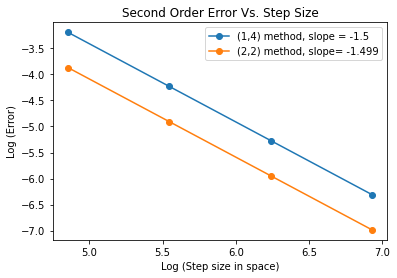

In [27]:
%matplotlib inline
# x for delta x
x = np.log([128, 256, 512, 1024])
#y for norm difference

y0 = np.log([diff_128, diff_256, diff_512, diff_1024])
y1 = np.log([diff_128_CN, diff_256_CN, diff_512_CN, diff_1024_CN])

fig, ax = plt.subplots()
#calculating slope
slope_0=(y0[1]-y0[0])/(x[1]-x[0])
slope_1=(y1[1]-y1[0])/(x[1]-x[0])
#plotting the fitted lines
ax.plot(x, y0,marker='o',linestyle='-',label='(1,4) method, slope = '+str(round(slope_0,3)))
ax.plot(x,y1,marker='o',linestyle='-',label='(2,2) method, slope= '+str(round(slope_1,3)))
#ax.scatter(x,y0,label='Error of (1,4) method')
#ax.scatter(x,y1,label='Error of (2,2) method')

#defining the axes and title
ax.legend(loc = 'best')
plt.title('Second Order Error Vs. Step Size')
plt.xlabel('Log (Step size in space)')
plt.ylabel('Log (Error)')
plt.savefig('hw4_mb.png')
plt.show()